## Comparação de Resultados Primeiro Teste *versus* Segundo Teste ##

Nesta análise observamos o ganho percentual de aprendizagem do aluno ao compararmos o primeiro e o segundo teste que ele realiza de determinada matéria. O primeiro teste é aplicado antes do incio das aulas e o segundo após toda a jornada do aluno.

Nossa hipótese é que em média o aluno tem uma média de acerto mais alto do segundo teste do que no primeiro. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

In [2]:
# define o tamanho das figuras 
plt.rcParams["figure.figsize"] = (15,5) 

In [3]:
def print_test_shapiro(df):
  df = df.dropna().to_numpy()
  print(f'Amostra: {len(df)}')
  shapiro_stat, shapiro_p_value = stats.shapiro(df)
  print(f'Valor da estatística de Shapiro-Wilk: {shapiro_stat}')
  print(f'P-valor de Shapiro-Wilk: {shapiro_p_value}')
  if shapiro_p_value > 0.05 :
    print('Com 95% de confiança, os dados \033[1msão similares a uma distribuição normal\033[0;0m segundo o teste de Shapiro-Wilk.')
  else:
    print('Com 95% de confiança, os dados \033[1mnão são similares a uma distribuição normal\033[0;0m segundo o teste de Shapiro-Wilk.')

In [5]:
#upload data
data = pd.read_csv('data_test.csv')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64170 entries, 0 to 64169
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   student_id      64170 non-null  int64  
 1   place           64170 non-null  object 
 2   curso_id        64170 non-null  int64  
 3   first_test      64170 non-null  object 
 4   question_id     64170 non-null  int64  
 5   correct_first   64170 non-null  int64  
 6   second_test     64170 non-null  object 
 7   correct_second  64170 non-null  float64
 8   date_first      64170 non-null  object 
 9   date_second     64170 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 4.9+ MB


In [7]:
data['correct_first']=data['correct_first'].astype('int')

In [13]:
data_groupby=pd.DataFrame(data.groupby(['student_id','curso_id'])[['correct_first',
                                        'correct_second']].sum()).reset_index()
data_groupby['%_first']=data_groupby['correct_first']/25
data_groupby['%_second']=data_groupby['correct_second']/25
data_groupby['delta']=np.round((data_groupby['%_second']-data_groupby['%_first'])*100,2)

In [16]:
#percentual mean increase by course
pd.DataFrame(data_groupby.groupby('curso_id')['delta'].mean()).reset_index().rename(
    columns={'delta':'percentual mean increase'})

,curso_id,percentual mean increase
0,1,24.112311
1,2,15.783133
2,3,35.552428
3,4,12.250000
4,5,12.752941
5,6,5.052632
6,7,11.000000
7,8,14.048780
8,9,16.000000
9,10,0.000000


Observando o ganho percentual por curso, notamos que os cursos 1 e 3 são os cursos com maior ganho percentual quando comparamos o resultado do primeito teste com o do segundo. 

Nossa hipótese é que os alunos performam melhor na prova após cumprirem a jornada de aprendizado. Para validarmos esta hipótese nós a testaremos a seguir

### Curso ID 3 ###
Média de pontos percentuais: 35.5524281pp

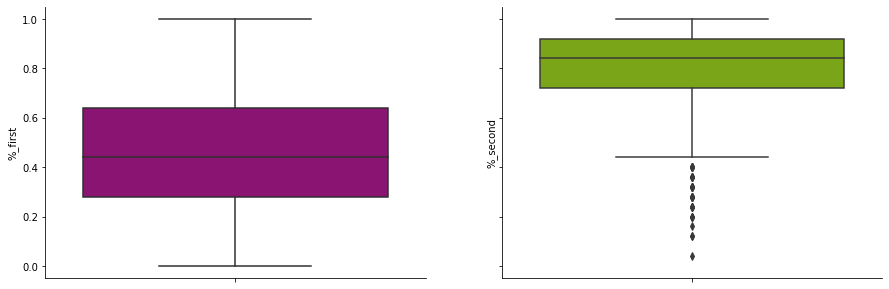

In [22]:
fig, axs = plt.subplots(nrows=1,ncols=2, sharey=True)
sns.boxplot(y=data_groupby.loc[data_groupby['curso_id']==3,'%_first'], 
            ax=axs[0], color='#9E007E')
axs[0].set_ylabel('')
axs[0].set_xlabel('%_first_correct_answers', fontsize=14)
sns.boxplot(y=data_groupby.loc[data_groupby['curso_id']==3,'%_second'], 
            ax=axs[1], color='#84BD00')
axs[1].set_xlabel('%_second_correct_answers', fontsize=14)
axs[1].set_ylabel('')
axs[1].axes.get_yaxis().set_visible(False)
sns.despine(right=True, top=True);

Podemos observar que a mediana de acerto no segunda prova sobe, mostrando que 50% dos alunos acertam mais questões nesta prova do que na primeira. Observamos também que diminui a variabilidade de acerto ao compararmos o segundo teste com o primeiro.

In [25]:
#checamos se a distribuição segue uma normal
print_test_shapiro(data_groupby.loc[data_groupby['curso_id']==3,'%_first'])

Amostra: 1421
Valor da estatística de Shapiro-Wilk: 0.9762173295021057
P-valor de Shapiro-Wilk: 1.4279688000627677e-14
Com 95% de confiança, os dados não são similares a uma distribuição normal segundo o teste de Shapiro-Wilk.


In [26]:
print_test_shapiro(data_groupby.loc[data_groupby['curso_id']==3,'%_second'])

Amostra: 1421
Valor da estatística de Shapiro-Wilk: 0.9043660163879395
P-valor de Shapiro-Wilk: 6.32384393546896e-29
Com 95% de confiança, os dados não são similares a uma distribuição normal segundo o teste de Shapiro-Wilk.


In [29]:
stats.wilcoxon(x=data_groupby.loc[data_groupby['curso_id']==3,'%_first'],
               y=data_groupby.loc[data_groupby['curso_id']==3,'%_second'],
               alternative='less')

WilcoxonResult(statistic=12140.0, pvalue=1.4898565044583763e-216)

Não evidências para que refutemos a hipótese nula

### Curso ID 1 ###
Média de pontos percentuais: 24.112311pp

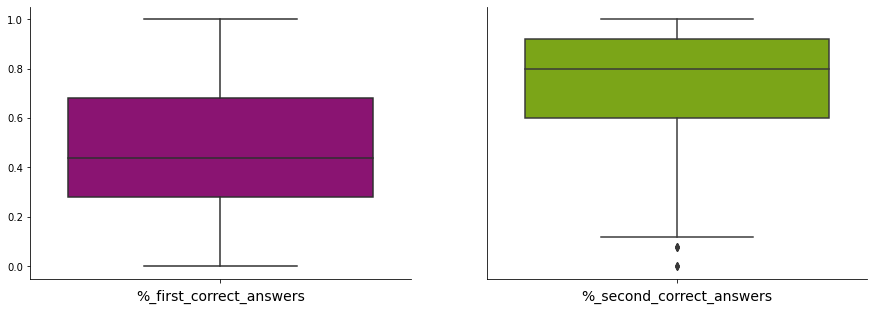

In [30]:
fig, axs = plt.subplots(nrows=1,ncols=2, sharey=True)
sns.boxplot(y=data_groupby.loc[data_groupby['curso_id']==1,'%_first'], ax=axs[0], color='#9E007E')
axs[0].set_ylabel('')
axs[0].set_xlabel('%_first_correct_answers', fontsize=14)
sns.boxplot(y=data_groupby.loc[data_groupby['curso_id']==1,'%_second'], ax=axs[1], color='#84BD00')
axs[1].set_xlabel('%_second_correct_answers', fontsize=14)
axs[1].set_ylabel('')
axs[1].axes.get_yaxis().set_visible(False)
sns.despine(right=True, top=True);

Assim como no curso 1 observamos que a mediana de acerto no segunda prova sobe, mostrando que 50% dos alunos acertam mais questões nesta prova do que na primeira. Observamos também que diminui a variabilidade de acerto ao compararmos o segundo teste com o primeiro.

In [31]:
print_test_shapiro(data_groupby.loc[data_groupby['curso_id']==1,'%_first'])

Amostra: 463
Valor da estatística de Shapiro-Wilk: 0.9702516198158264
P-valor de Shapiro-Wilk: 4.354617999524635e-08
Com 95% de confiança, os dados não são similares a uma distribuição normal segundo o teste de Shapiro-Wilk.


In [32]:
print_test_shapiro(data_groupby.loc[data_groupby['curso_id']==1,'%_second'])

Amostra: 463
Valor da estatística de Shapiro-Wilk: 0.89936363697052
P-valor de Shapiro-Wilk: 6.62725195376665e-17
Com 95% de confiança, os dados não são similares a uma distribuição normal segundo o teste de Shapiro-Wilk.


In [33]:
stats.wilcoxon(x=data_groupby.loc[data_groupby['curso_id']==1,'%_first'],
               y=data_groupby.loc[data_groupby['curso_id']==1,'%_second'],
               alternative='less')

WilcoxonResult(statistic=8198.5, pvalue=1.8636073177489775e-51)

Não há evidências para rejeitarmos a hipótese nula.